## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [2]:
# Preliminaries

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Let's explore the dataset a little bit

In [3]:
# Load the data, shuffled and split between train and test sets (x_train and y_rain)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train[0].shape

(28, 28)

In [5]:
# Let's just look at a particular example to see what is inside

x_train[444]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 116, 137, 251, 178,  15,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# What is the corresponding label in the training set?
y_train[444]

np.uint8(2)

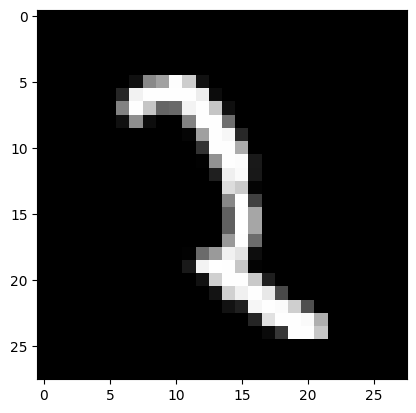

In [7]:
# Let's see what this image actually looks like

plt.imshow(x_train[444], cmap="Greys_r")

In [8]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, "train samples")
print(x_test.shape, "test samples")

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [9]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28 * 28)
x_test = x_test.reshape(len(x_test), 28 * 28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [10]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[
    333
]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [11]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation="relu", input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation="softmax"))

/home/abhiram/projects/dl-rl-internship/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748975046.268314   24084 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [12]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Let's compile the model
learning_rate = 0.001
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=["accuracy"],
)
# note that `categorical cross entropy` is the natural generalization
# of the loss function we had in binary classification case, to multi class case

In [14]:
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
)

Epoch 1/30


I0000 00:00:1748975050.748066   24337 service.cc:152] XLA service 0x7effa00045c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748975050.748156   24337 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-06-03 18:24:10.818694: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748975050.948190   24337 cuda_dnn.cc:529] Loaded cuDNN version 90300


 80/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5268 - loss: 1.4764

I0000 00:00:1748975052.533557   24337 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7522 - loss: 0.8037

2025-06-03 18:24:15.397108: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_68', 4 bytes spill stores, 4 bytes spill loads

2025-06-03 18:24:16.292808: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_61', 8 bytes spill stores, 8 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7524 - loss: 0.8031 - val_accuracy: 0.9379 - val_loss: 0.2022
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9205 - loss: 0.2685 - val_accuracy: 0.9539 - val_loss: 0.1436
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9395 - loss: 0.2051 - val_accuracy: 0.9612 - val_loss: 0.1209
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9480 - loss: 0.1759 - val_accuracy: 0.9673 - val_loss: 0.1092
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9551 - loss: 0.1493 - val_accuracy: 0.9678 - val_loss: 0.1030
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9584 - loss: 0.1435 - val_accuracy: 0.9691 - val_loss: 0.1004
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.1307 - val_accuracy: 0.9701 - val_loss: 0.0977
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9626 - loss: 0.1263 - val_accuracy: 0.9731 - val_

In [15]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09693019092082977
Test accuracy: 0.9764999747276306


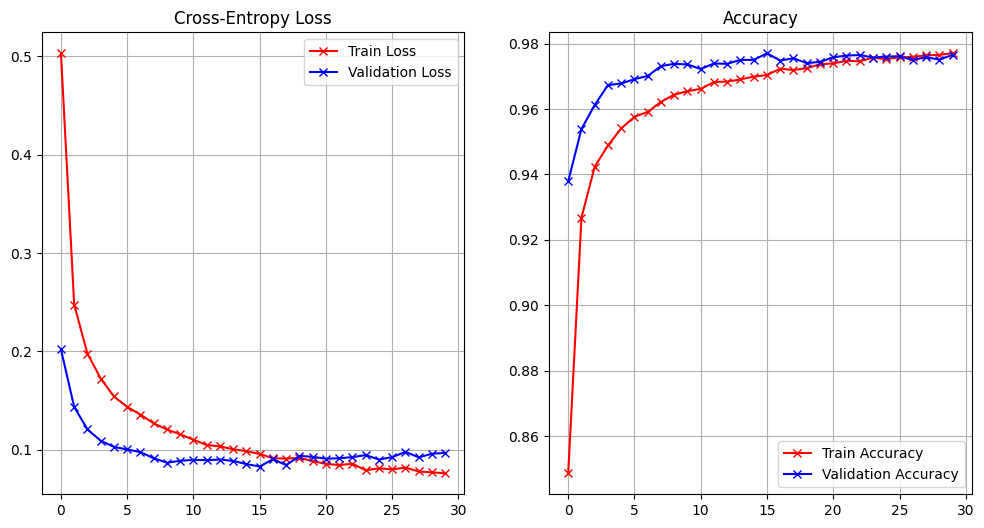

In [16]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))

    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"], "r-x", label="Train Loss")
    ax.plot(history.history["val_loss"], "b-x", label="Validation Loss")
    ax.legend()
    ax.set_title("Cross-Entropy Loss")
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)

    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"

    ax.plot(history.history[train_acc], "r-x", label="Train Accuracy")
    ax.plot(history.history[val_acc], "b-x", label="Validation Accuracy")
    ax.legend()
    ax.set_title("Accuracy")
    ax.grid(True)


plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




## SOLUTION

In [17]:
# Model with two hidden layers (400 and 300 units)

model_2 = Sequential()

# hidden layers
model_2.add(Dense(400, activation="relu", input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation="relu"))
model_2.add(Dropout(0.4))

# output layer
model_2.add(Dense(10, activation="softmax"))

# Compile the model
learning_rate = 0.001
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=["accuracy"],
)

# Train the model
batch_size = 128
epochs = 20

history = model_2.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
)

# Print model summary to see number of parameters
model_2.summary()

Epoch 1/20
462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8218 - loss: 0.5662

2025-06-03 18:24:52.308227: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_989', 24 bytes spill stores, 24 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8230 - loss: 0.5627

2025-06-03 18:24:54.238087: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_61', 4 bytes spill stores, 4 bytes spill loads

2025-06-03 18:24:54.437769: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_68', 132 bytes spill stores, 132 bytes spill loads

2025-06-03 18:24:54.603963: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_61', 572 bytes spill stores, 572 bytes spill loads

2025-06-03 18:24:54.610301: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_68', 612 bytes spill stores, 612 bytes spill loads

2025-06-03 18:24:54.695975: I external/local

469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8231 - loss: 0.5622 - val_accuracy: 0.9630 - val_loss: 0.1200
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9510 - loss: 0.1624 - val_accuracy: 0.9710 - val_loss: 0.0934
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1181 - val_accuracy: 0.9753 - val_loss: 0.0829
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.1016 - val_accuracy: 0.9782 - val_loss: 0.0743
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0871 - val_accuracy: 0.9816 - val_loss: 0.0697
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0769 - val_accuracy: 0.9795 - val_loss: 0.0758
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9782 - loss: 0.0736 - val_accuracy: 0.9787 - val_loss: 0.0746
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.0651 - val_accuracy: 0.9793 - va

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 874,622 (3.34 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,312 (1.67 MB)

> Model 1 had 55,050 total parameters while Model 2 has 874,622 total parameters and 437,313 optimized parameters

In [18]:
## We will use Keras evaluate function to evaluate performance on the test set
score = model_2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2025-06-03 18:25:18.108922: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_61', 128 bytes spill stores, 128 bytes spill loads

2025-06-03 18:25:18.126613: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_61_0', 56 bytes spill stores, 56 bytes spill loads

2025-06-03 18:25:18.134418: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_61', 4 bytes spill stores, 4 bytes spill loads

2025-06-03 18:25:18.178065: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_61', 572 bytes spill stores, 572 bytes spill loads

2025-06-03 18:25:18.184429: I external/local

Test loss: 0.07264157384634018
Test accuracy: 0.9833999872207642


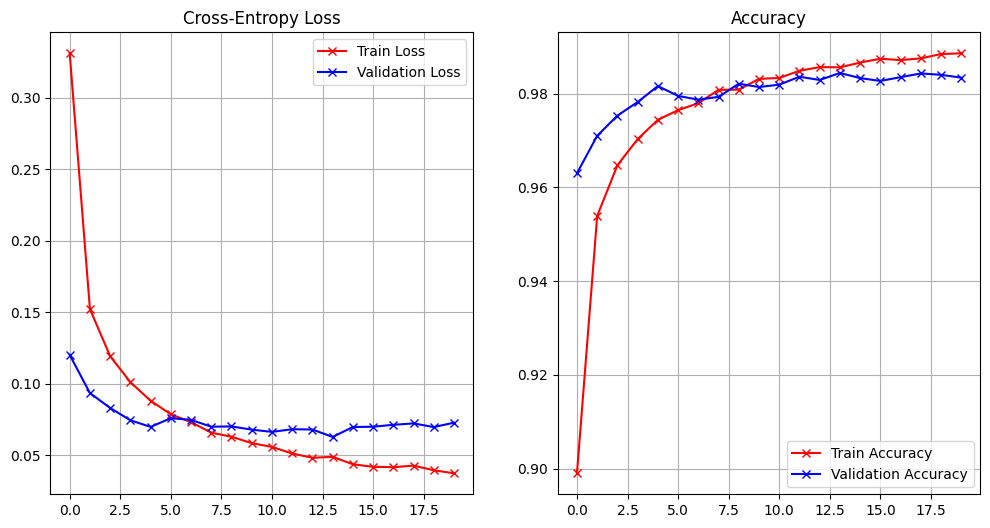

In [19]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))

    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"], "r-x", label="Train Loss")
    ax.plot(history.history["val_loss"], "b-x", label="Validation Loss")
    ax.legend()
    ax.set_title("Cross-Entropy Loss")
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)

    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"

    ax.plot(history.history[train_acc], "r-x", label="Train Accuracy")
    ax.plot(history.history[val_acc], "b-x", label="Validation Accuracy")
    ax.legend()
    ax.set_title("Accuracy")
    ax.grid(True)


plot_loss_accuracy(history)

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?

Model 2 has a lot more parameters compared to model 1. Therefore, model 2 can perform better on large and complex datasets. Model 2 has way more parameters (874,622 vs. 55,050), meaning it's more complex. From the graphs, it seems like Model 2 fits the training data very well. It gets very high accuracy and low loss. But the validation loss starts increasing slightly after a point, which means it’s starting to overfit. So, even though Model 2 is more powerful, I'd prefer Model 1 for production because it’s simpler, still performs very well, and generalizes better.

Both models show decreasing training loss and increasing training accuracy, which is good. But the validation loss flattens and then slightly rises, while validation accuracy stays mostly flat. This means the models are learning the training data well, but not improving much on new, unseen data after a certain point. The loss is more meaningful here because it shows early signs of overfitting, while accuracy stays high and might hide that problem.

To reduce overfitting, I'd suggest adding dropout layers or using early stopping so the model doesn't keep training after it stops improving. Another option is to slightly reduce the size of Model 2. Also, tweaking the learning rate could help the model learn more steadily. Trying this out should make the validation loss stay lower and give more reliable performance on unseen data.

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7845 - loss: 0.7021 - val_accuracy: 0.9500 - val_loss: 0.1664
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9400 - loss: 0.1961 - val_accuracy: 0.9661 - val_loss: 0.1079
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9550 - loss: 0.1470 - val_accuracy: 0.9722 - val_loss: 0.0890
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.1119 - val_accuracy: 0.9752 - val_loss: 0.0859
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.0982 - val_accuracy: 0.9774 - val_loss: 0.0739
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0836 - val_accuracy: 0.9795 - val_loss: 0.0708
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0797 - val_accuracy: 0.9796 - val_loss: 0.0680
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.0707 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 874,622 (3.34 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,312 (1.67 MB)

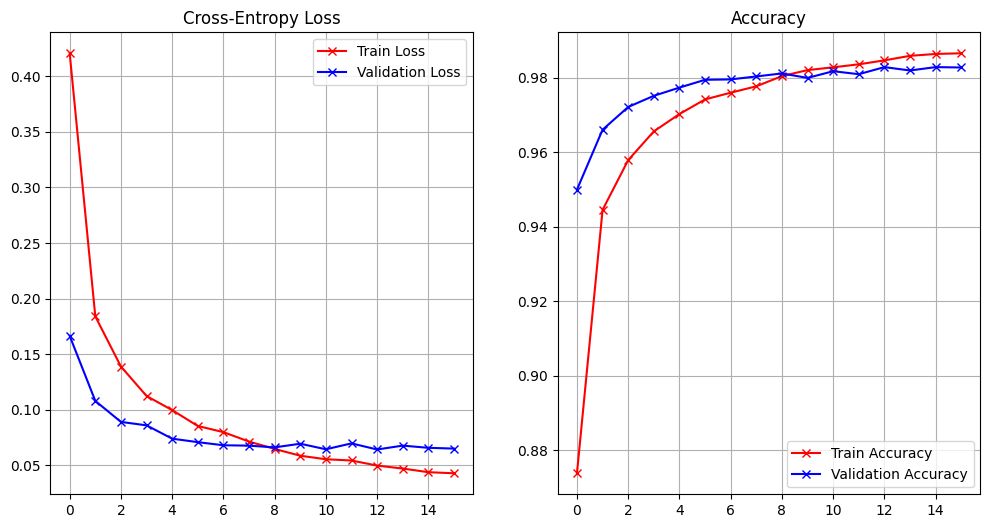

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
# Train the model with updated learning rate, epochs & early stop
model_3 = Sequential()

# hidden layers
model_3.add(Dense(400, activation="relu", input_shape=(784,)))
model_3.add(Dropout(0.4))
model_3.add(Dense(300, activation="relu"))
model_3.add(Dropout(0.4))

# output layer
model_3.add(Dense(10, activation="softmax"))

learning_rate = 0.0005
model_3.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=["accuracy"],
)

batch_size = 128
epochs = 30

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model_3.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

# Print model summary to see number of parameters
model_2.summary()
plot_loss_accuracy(history)

In [25]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0641813576221466
Test accuracy: 0.9829000234603882


We can see that, by reducing learning rate to 0.0005, increasing epochs to 30 and stopping early when there are signs of overfitting, the model performs significantly better.